# Esercitazione 1

Nella cartella sono presenti:
- I file *.cpp* e *.h* della classe __BlockAnalisys__ per l'analisi a blocchi.
- I file *.cpp*, *.h* e *.x* delle tre parti:
    1. `test_rnd`, per il test del generatore di numeri casuali.
    2. `dice`, per le estrazioni dei dadi.
    3. `buffon`, per l'esperimento di Buffon.
- I file *.input* con gli input dei programmi.
- Le cartelle con gli output dei programmi di `test_rnd` e `dice`.
- I file di output di `buffon`:
    - *buffon.dat*.
    - *buffon_1.dat*
- I file di input della classe __random__:
    - *seed.in*.
    - *Primes*.
- Il programma `clear.sh`.
- Il `makefile`.
- Il *Jupyter Notebook* e i *.png* delle sue immagini.


<img src="Menu.png">

L'esercitazione è stata divisa in tre parti:
1. Test del generatre di numeri casuali.
2. Verificare il teorema del limite centrale con il lancio di vari dadi.
3. Esperimento di Buffon.

Prima di compilare, eseguire i seguenti comandi da terminale:
```bash
cd ..           #Vado nella cartella iniziale dove ci deve essere il file setup.sh
source setup.sh
```

Abbiamo utilizzato la libreria `armadillo` bisogna includerla manualmente nella compilazione se non avviene in maniera automatica.

Queste linee di codice servono per importare le librerie necessarie per far funzionare i codici nel notebook.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import cauchy
from scipy.stats import norm

## 1 Test del Generatore di Numeri Casuali

La generazione di numeri casuali è molto utile per lo studio stocastico di problemi numerici di ogni tipo, però è molto difficile e spesso inefficente creare algoritmi su macchine deterministiche che possano comprendere la casualità.

Perciò si utilizzano metodi deterministici che si comportano in maniera stocastica, pur non essendo casuali.  In questa prima parte mostreremo come verificare se l'algoritmo per la generazione di numeri casuali possa approssimare bene un evento stocastico.

In questo caso studieremo la generazione uniforme di numeri "casuali" tra $0$ ed $1$.

### 1.1 Test sulla Media e sulla Varianza

__L'analisi a blocchi__: si generano uniformemente numeri casuali tra $0$ ed $1$ e li si dividiono in blocchi, per ciascun blocco calcoliamo la media.  Utilizzando il teorema del limite centrale, discusso nella seconda parte di questa esercitazione, ci aspettiamo che la media delle medie e la media delle varianze convergano per un gran numero di valori generati, assumendo come errori la varianza sulle medie di questi valori.  Nel nostro caso abbiamo generato $1'000'000$ di numeri e divisi in $100$ blocchi, perciò $10'000$ numeri per blocco.

Sapendo come sono distribuiti i valori generati e l'intervallo in questione possiamo ricavare i valori di aspettazione; il concetto di __distribuzione di probabilità__ è discusso in seguito nella sezione $1.2$.

Per le medie:
$$
\langle r \rangle =\int_0^1 rdr=\frac{1}{2}
$$

Perciò per le varianze:
$$
\sigma^2=\int_0^1 \left(r-\frac{1}{2}\right)^2dr=\frac{1}{12}
$$

Di seguito osserviamo i valori della media e della varianza in funzione del numero di blocchi con i rispettivi errori.

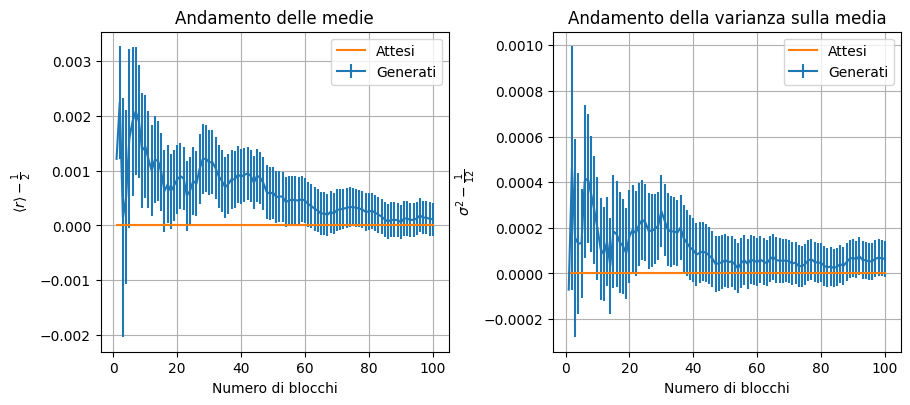

In [2]:
data=[]
#Carico i dati generati
data.append(np.loadtxt("test/output_ave.dat"))
data.append(np.loadtxt("test/output_var.dat"))

#List di titoli
titles=[r"Andamento delle medie",r"Andamento della varianza sulla media"]
labels=[r"$\langle r \rangle-\frac{1}{2}$",r"$\sigma^2-\frac{1}{12}$"]
#Faccio più plots
fig,axx=plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    axx[i].errorbar(data[i][:,0],data[i][:,2],yerr=data[i][:,3],label="Generati")
    axx[i].plot(data[i][:,0],np.zeros(np.shape(data[i])[0]),label="Attesi")
    axx[i].set_xlabel(r"Numero di blocchi")
    axx[i].set_ylabel(labels[i])
    axx[i].set_title(titles[i])
    axx[i].grid(True)
    axx[i].legend()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.show()

Per facilitare l'analisi si è studiata la differenza tra valori attesi e valori osservati.

Si vede che queste differenze tendono a zero aumentando il numero di valori generati, mostrando una convergenza tra i valori attesi e quelli generati.

Nel caso della varianza sembra stabilirsi sopra lo zero, questo comportamento potrebbe essere attribuito ad un problema di approssimazione essendo il valore molto piccolo.  Si può vedere che questo comportamento diminuisce qualora si cambiano i valori di input, i valori generati e soprattutto il numero di blocchi.

### 1.2 Distribuzione dei Numeri Generati

L'estrazione di numeri generati casualmente è caratterizzata dalla sua __distribuzione di probabilità__ $p(r)$, cioè di come si "spartisce" la probabilità tra i vari eventi.

Come accennato precedentemente i numeri sono generati in maniera uniforme tra $0$ ed $1$, cioè la probabilità di estrarre un numero in questo intervallo è spartita in maniera equa.  Bisogna tenere conto che solo i valori possibili sono quelli nell'intervallo e che la somma delle probabilità di tutti gli eventi possibili è $1$, quindi:
$$
\int_{-\infty}^{+\infty}p(r)dr=1
$$
Visto che non è possibile estrarre numeri fuori dall'intervallo $[0,1)$ la distribuzione con $r$ fuori da questo intervallo è $p(r)=0$.

Sapendo questo l'integrale di prima diveta:
$$
\int_0^1p(r)dr=1
$$
Qundi tra 0 e 1 la distribuzione è:
$$
p(r)=\frac{1}{r_{max}-r_{min}}=1
$$

In [3]:
#Funzione che descrive la distribuzione uniforme attesa
def unif_dist():
    x=np.linspace(-0.5,1.5,1000)
    y=np.zeros(np.shape(x))
    for i in range(np.shape(x)[0]):
        if x[i]>=0 and x[i]<=1:
            y[i]=1
    return x,y

Di seguito si osserva la distribuzione dei numeri generati e quella attesa.

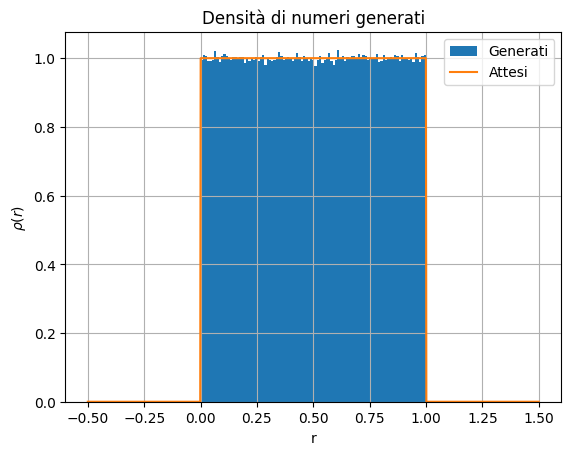

In [4]:
#Carico i dati da file
unif=np.loadtxt("test/output_numb.dat")
#Genero i dati attesi
x,y=unif_dist()

#Creo un istogramma dei numeri generati
plt.hist(unif,np.linspace(0,1,num=100),density=True,label="Generati")
plt.plot(x,y,label="Attesi")
#Parte estetica
plt.xlabel("r")
plt.ylabel(r"$\rho(r)$")
plt.title("Densità di numeri generati")
plt.legend()
plt.grid(True)

plt.show()

Si può osservare che i valori ottenuti rispecchiano molto bene i valori attesi.  Nonostante questo non possaimo ancora dire che la nostra distribuzione sia uniforme, o meglio che non lo sia, per questo dobbiamo utilizzare il *test del* $\chi^2$.

#### 1.2.1 Distribuzione dei $\chi^2$

Il *test del* $\chi^2$ consiste nel dividere gli $n$ eventi in canali, quindi $M$ sottogruppi, e vedere quanto la porobabilità osservata $O_i$ si discosti da quella attesa $E_i$ in ciascuno degli $i$ canali.  Per fare ciò si usa la formula:
$$
\chi^2=\sum_{i=0}^M\frac{\left(O_i-E_i\right)^2}{E_i}
$$

Visto che la distribuzione è uniforme ci aspettiamo una $E_i=\frac{n}{M}$, quindi osserviamo quanti $n_i$ eventi rientrano in ciasun canale.  Perciò la formula diveta:
$$
\chi^2=\sum_{i=0}^M \frac{\left(n_i-\frac{n}{M}\right)^2}{\frac{n}{M}}
$$

Per ogni blocco abbiamo iterato lo stesso ragionamento.  Abbiamo diviso l'intervallo in $M$ canali, in questo caso $100$, e applichiamo la formula sopra.

Ci aspettiamo che il valore di $\chi^2$ sia circa $E_i=\frac{n}{M}$ perciò visto che in questo caso ci sono $10'000$ numeri in ogni blocco e dividiamo l'intervallo in $100$ canali ci aspettiamo $\chi^2\approx100$. Per verificare la compatibilità dei valori ottenuti con la distribuzione teorica, compariamo i vari valori di $\chi^2$ ottenuti e la *distribuzione di* $\chi^2$.

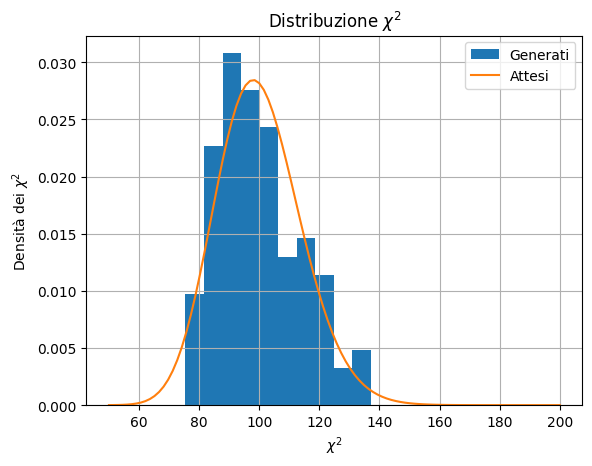

In [5]:
#Carico i dati da file
chi2_data=np.loadtxt("test/output_chi2.dat")
#Imposto le ascisse per la distribuzione attesa
x=np.linspace(50,200,100)

#Creo un istogramma con la distribuzione dei chi2
plt.hist(chi2_data,10,density=True,label="Generati")
plt.plot(x,chi2.pdf(x,100),label="Attesi")
#Parte estetica
plt.xlabel(r"$\chi^2$")
plt.ylabel(r"Densità dei $\chi^2$")
plt.title(r"Distribuzione $\chi^2$")
plt.legend()
plt.grid(True)


plt.show()

Si può osservare che la distribuzione dei $\chi^2$ ottenuti dai valori generati segue la distribuzione teorica di $\chi^2$, concludendo che il generatore di numeri (pseudo)casuali approssima "bene" l'estrazione di numeri effettivamente casuali.

## 2 Teorema del Limite Centrale

Il __teorema del limite centrale__ afferma che se si prendono $N$ eventi indipendenti con uno scarto quadratico medio (varianza) $\sigma^2$ che non diverge, quindi $\sigma^2<\infty$, allora la distribuzione delle medie di questi eventi convergeranno asintoticamente ad una *Gaussiana*.

Per verificarlo abbiamo simulato il lancio di dadi che seguono diverse distribuzioni ed abbiamo osservato il loro comportamento.  I vari dadi sono:
- Standard (numeri distribuiti uniformemente tra $0$ e $6$).
- Esponenziale (distribuzione esponenziale).
- Lorentzaino (distribuzione di Lorentz).

Abbiamo comparato l'estrazione di lanci raggruppati in $10'000$ blocchi da $N$ elementi ciascuno  per ogni dado.  Per tutti i raggruppamenti si sono calcolate le *medie parziali* $S_N$ di ogni blocco ed osservata la distribuzione di questi ultimi valori.
$$
S_N=\frac{1}{N}\sum_{i=1}^N r_i
$$

Si osserva se aumentando il valore di $N$ le distribuzioni convergono alle distribuzioni desiderate.

### 2.1 Dado Standard

Utilizziamo un dado stdandard, quidi con valori nell'intervallo tra $1$ e $6$, però nel nostro caso non si sono utilizzati valori discreti ma valori nell'intervallo continuo $[1,6)$.

Trovaiamo il valore medio:
$$
\langle r\rangle =\int_1^6\frac{1}{6-1}r\,dr=\frac{7}{2}
$$

Troviamo la varianza:
$$
\sigma^2=\int_1^6\frac{1}{6-1}\left(r-\frac{3}{2}\right)^2dr=\frac{25}{12}
$$

Avendo una varianza finita il *teorema del limite centrale* dice che la distribuzione converge ad una Gaussiana centrata in $\frac{7}{2}$ ed una varianza $\frac{\sigma^2}{N-1}$. 

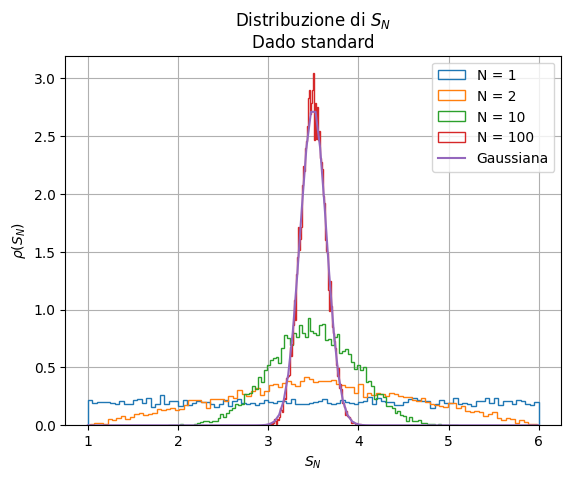

In [6]:
#Dati
N=np.array([1,2,10,100]) #Numeri per blocco
bins=100                 #Numeri di intervalli

#Ascisse per i vaolri attesi
x=np.linspace(1,6,bins)

#Valori della Gaussiana
ave=7/2                 #Vaolre medio
var=25/12
rms=np.sqrt(var/(N[-1]-1))  #Deviazione standard

#Creo istogrammi del dado standard
for n in N:
    #Carico i dati generati
    r_std=np.loadtxt("dice/standard_"+str(n)+".dat")
    h=plt.hist(r_std,bins,density=True,label="N = "+str(n),histtype='step')

plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado standard")
plt.legend()
plt.grid(True)

plt.show()

Osserviamo che all'aumentare della dimensione dei blocchi la distribuzione dei valori ha un picco sempre più alto nel valore medio e di  conseguenza la ditribuzione risulta sempre più concentrata vicino al valore medio.  Inoltre notiamo che la distribuzione con blocchi da $10$ ha già un andamento visibilmente gaussiano però questo comportamento è ancora più accentuato per i blocchi da $100$ come si mostra in figura.

### 2.2 Dado Esponanziale

Verifichiamo il *teorema del limite centrale* anche per altre distribuzioni.  Un altro esmpio è la distribuzione esponenziale, definita:
$$
p(r)=\lambda\,e^{-\lambda r}
$$
per i valori non negativi di $r$ e $0$ altrimenti.  Nel nostro caso utilizzeremo $\lambda=1$.

Ricaviamo il valore medio e la varianza di questa distribuzione:
$$
\langle r\rangle = \int_0^{+\infty}e^{-r}r\,dr=1
$$
$$
\sigma^2=\int_0^{+\infty}e^{-r}(r-1)^2dr=1
$$

Anche in questo caso abbiamo una varianza finita, quindi possiamo utilizzare ancora il *teorema del limite centrale*.  Quindi ci aspettaimo di trovare una guassiana centrata in $1$ con una varianza di $\frac{1}{N-1}$.

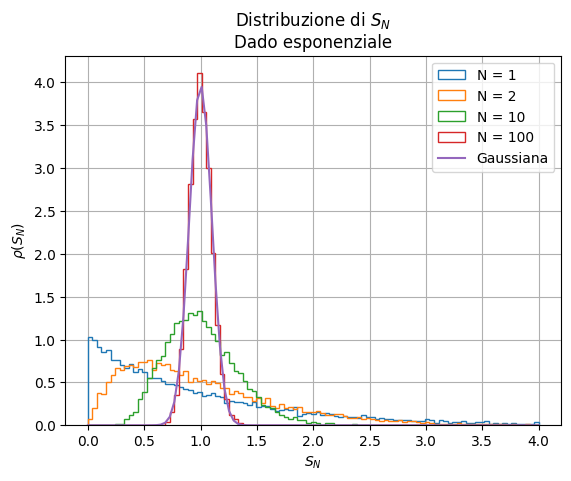

In [7]:
#Ascisse dei valori attesi
x=np.linspace(0,4,bins)

#Valori della Gaussiana
ave=1                 #Valore medio
rms=1/np.sqrt(N[-1]-1)  #Deviazione standard

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_exp=np.loadtxt("dice/exponential_"+str(n)+".dat")
    plt.hist(r_exp,np.linspace(0,4,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado esponenziale")
plt.legend()
plt.grid(True)

plt.show()

Possiamo osservare che aumentando $N$ la distribuzione tende sempre più ad una gaussiana, fino a diventare comparabile con la distribuzione attesa.

### 2.3 Dado Lorentziano

Proviamo ad utilizzare la distribuzione di *Cauchy-Lorentz* definita:
$$
p(r)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2} 
$$
per $x\in(-\infty,+\infty)$.

In questo caso l'integrale per ottenere media e varianza divergono, perciò non si può utilizzare il teorema del limite centrale.  Tuttavia, anche se la distribuzione non converge ad una gaussiana, possaimo notare se converge a qualche altro tipo di distribuzione.

Proviamo a ripetere lo stesso procedimento anche per una Lorentziana con $\Gamma=1$ e $\mu=0$.

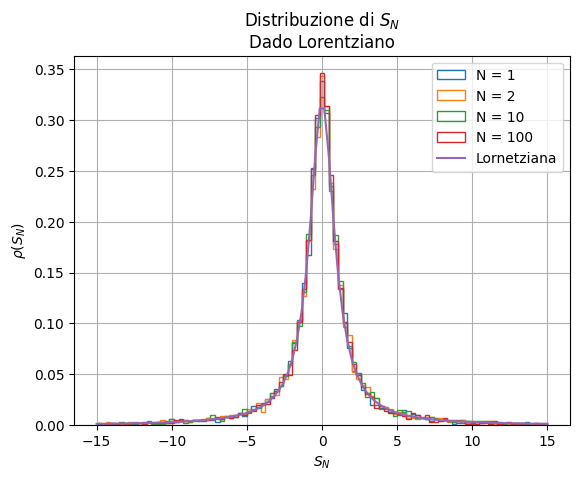

In [8]:
#Ascisse dei valori attesi
x=np.linspace(-15,15,bins)

#Valori della Lorentziana
ave=0      #mu
Gamma=1    #Gamma

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_ltz=np.loadtxt("dice/lorentz_"+str(n)+".dat")
    plt.hist(r_ltz,np.linspace(-15,15,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,cauchy.pdf(x,ave,Gamma),label="Lornetziana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado Lorentziano")
plt.legend()
plt.grid(True)

plt.show()

Notiamo che questa distribuzione converge a se stessa, perciò ci permette di ampliare il teorema del limite centrale alle distribuzioni con varianza infinita, però in questi casi le distribuzioni non convergeranno più solamente a delle gaussiane ma anche ad altre distribuzioni.

## 3 Esperimento di Buffon

L'__esperimento di Buffon__ consiste nel lanciare un ago di lunghezza $L$ su un piano con delle rette parallele equidistandi a distanza $d$, dove $d>L$.

Si dimostra che la probabilità $P$ che l'ago cada a ridosso di una retta è:
$$
P=\frac{2\,L}{\pi\,d}
$$
Possiamo ricavare la probabilità che l'ago cada a ridosso di una retta simulando molte volte questo sistema e contare quante volte avviene questo evento, quindi se faccio $N_{thr}$ lanci e l'ago cade $N_{hit}$ su una retta qualsiasi, allora:
$$
P=\lim_{N_{thr}\to +\infty}\frac{N_{hit}}{N_{thr}}
$$
Se cominiamo queste due relazioni possiamo trovare una modo per stimare $\pi$.  Quindi invertendo la prima relazione e sostituendo $P$ con il limite si trova che:
$$
\pi=\frac{2\,L}{P\,d}=\lim_{N_{thr}\to+\infty}\frac{2\,L\,N_{thr}}{N_{hit}\,d}
$$

Per simulare il lancio si è seguita la seguente procedura:
1. Determiniamo una coppia di $(x_1,y_1)$ uniformemenre distribuiti nello spazio, questa sarà la prima estremità dell'ago.
2. Troviamo una coppia di punti $(x_0,y_0)$ sulla __circonferenza unitaria__, con il seguente procedimento:
    - Estraiamo dei punti $(x',y')$ distribuiti uniformemente in $[-1,1]\times[-1,1]$.
    - Calcoliamo la norma quadra $r^2=||\vec{r'}||^2=(x')^2+(y')^2$.
    - Se $r^2>1$ si rigetta la coppia $(x',y')$ e si ricomincia, altrimenti si accetta e si va avanti.
    - Restituiamo come risultato $(x_0,y_0)=\left(\frac{x'}{r},\frac{y'}{r}\right)$, dove $r=\sqrt{r^2}$.

    <font color=red>N.B.</font> In teoria dovremmo controllare che $||\vec{r'}||$ sia maggiore del raggio per rigettare non $||\vec{r'}||^2$, però la scelta di utilizzare una circonferenza unitaria si è fatta per diminuire i calcoli: se $||\vec{r'}||$ è maggiore di $1$ allora lo sarà perforza anche $||\vec{r'}||^2$ e viceversa, lo stesso vale per $||\vec{r'}||<1$.
3. Troviamo la seconda estremità dell'ago:
    $$
    (x_2,y_2)=(x_1,y_1)+d\cdot(x_0,y_0)
    $$

Abbiamo generato $(x_1,y_1)$ con:
- $x_1=0$ .
- $y_1\in\left[-\frac{d}{2},\frac{d}{2}\right]$ .

Questa scelta è stata fatta per non mettere un vincolo nè sul numero di rette sul piano nè sulle dimensioni del piano stesso.  Infatti a noi interessa semplicemente se l'ago cade a ridosso di una retta; non importa su quale retta cada l'ago nè in quale punto i due s'incontrano.
Visto che il sistema è __invariante per traslazioni lungo__ $\boldsymbol{x}$ posso ignorare la coordinata $x_1$.
Inoltre, il sistema è __periodico lungo__ $\boldsymbol{y}$, c'è una retta ogni distanza $d$.

Grazie a queste considerazioni le noste condizioni ci permettono di simulare il lancio degli aghi su un piano infinito con infinite rette, diminuendo notevolmente la potenza di calcolo richiesta.

Abbaimo scelto come dati del problema: $d=2$, $L=1$.

### 3.1 Algoritmo 1

Abbiamo sviluppato un primo algoritmo dove si poneva la retta $(x,0)$ e controllato se l'ago cadesse sulla retta vedendo se il segno delle $y$ variasse, con la seguente condizione:
$$
sgn(y_1)\cdot sgn(y_2)<0
$$
Abbiamo ignorato i casi in cui uno dei due capi fosse sulla retta visto che la probabilità di questo evento è infinitesima, perciò trascurabile.

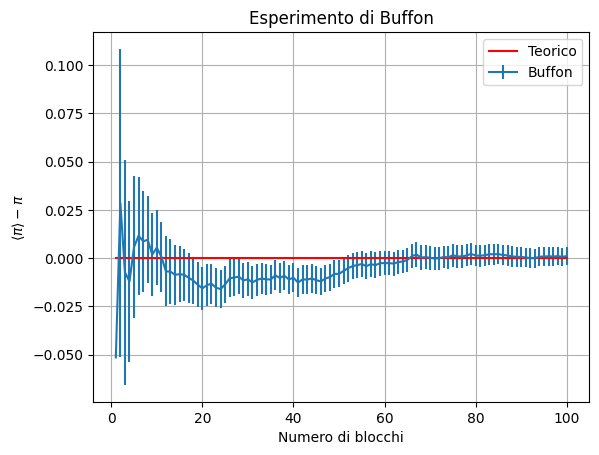

In [9]:
#Carica dati generati
buffon1=np.loadtxt("buffon_1.dat")
#Dati attesi
y=np.zeros(np.shape(buffon1)[0],dtype=float)

#Creo grafico con errore
plt.errorbar(buffon1[:,0],buffon1[:,1]-np.pi,yerr=buffon1[:,2],label="Buffon")
plt.plot(buffon1[:,0],y,label="Teorico",color="red")
#Parte estetica
plt.xlabel(r"Numero di blocchi")
plt.ylabel(r"$\langle\pi\rangle-\pi$")
plt.title(f"Esperimento di Buffon")
plt.legend()
plt.grid(True)

plt.show()

Vediamo che i risultati ottenuti sono altamente compatibili con il valore di $\pi$ fornito da __numpy__.

Questo algoritmo è veloce rendendolo efficiente e restituisce valori compatibili con altri metodi di calcolo più precise ma __non è sempre efficiente__, in questo caso funziona poichè $L\le\frac{d}{2}$.  Questo problema si presenta perchè non si tiene conto di una possibile intersezione con rette fuori dall'intervallo delle ordinate $\left[-\frac{d}{2},\frac{d}{2}\right]$, ciò è impossibile se $y_1$ è in tale intervallo e $L<\frac{d}{2}$; per $L=\frac{d}{2}$ comunque non ci sono problemi perchè eventuali intersezioni con suddette rette sarebbero con solo un estremo dell'ago, eventi che abbiamo definito trascurabili.
Verifichiamo dei problemi se $\frac{d}{2}<L<d$, poichè le intersezioni con altre rette non si possono più trascurare.

<font color=red>N.B.</font>: questo algoritmo non è compilato per recuperarlo bisiogna scommentare la riga *131* in `buffon.cpp` e commentare la riga *134*.

__Immagine da buffon.cpp__

<img src="Image.png">

### 3.2 Algoritmo 2

Per evitare le problematiche del precedente algoritmo ne abbiamo sviluppato un secondo.  Al posto di mettere una sola retta se ne mettono due posizionate a $(x,\pm\frac{d}{2})$.  Per capire se l'ago cadesse o meno su una retta si è fatto il seguente controllo:
$$
\frac{d}{2}<|y_2|
$$
visto che tutti i $y_1$ sono nell'intervallo $\left[-\frac{d}{2},\frac{d}{2}\right]$ allora se $y_2$ è fuori da questo intervallo deve essere a cavallo di una retta.

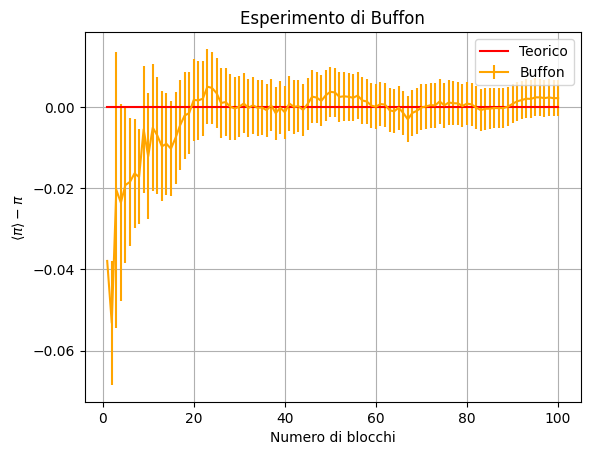

In [10]:
#Carica dati generati
buffon=np.loadtxt("buffon.dat")
#Dati attesi
y=np.zeros(np.shape(buffon)[0],dtype=float)

#Creo grafico con errore
plt.errorbar(buffon[:,0],buffon[:,1]-np.pi,yerr=buffon[:,2],label="Buffon",color="orange")
plt.plot(buffon[:,0],y,label="Teorico",color="red")
#Parte estetica
plt.xlabel(r"Numero di blocchi")
plt.ylabel(r"$\langle\pi\rangle-\pi$")
plt.title(f"Esperimento di Buffon")
plt.legend()
plt.grid(True)

plt.show()

Vediamo che anche in questo caso otteniamo il risultato voluto con un programma che gira alquanto velocemente, però questa volta otteniamo un risultato compatibile anche per $\frac{d}{2}<L<d$.

### 3.3 Confronto

Per $\frac{d}{2}<L<d$ l'unico algoritmo che funziona è l'*algoritmo 2*.  Ma come funzionano i due algoritmi se $L\le\frac{d}{2}$?

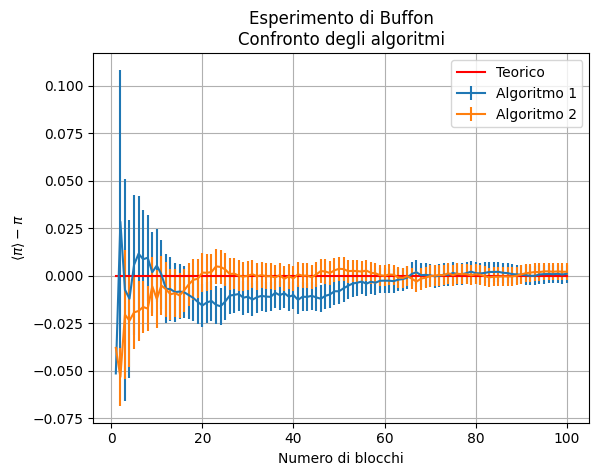

In [11]:
#Creo grafico con errore
plt.errorbar(buffon1[:,0],buffon1[:,1]-np.pi,yerr=buffon1[:,2],label="Algoritmo 1")
plt.errorbar(buffon[:,0],buffon[:,1]-np.pi,yerr=buffon[:,2],label="Algoritmo 2")
plt.plot(buffon[:,0],y,label="Teorico",color="red")
#Parte estetica
plt.xlabel(r"Numero di blocchi")
plt.ylabel(r"$\langle\pi\rangle-\pi$")
plt.title(f"Esperimento di Buffon\nConfronto degli algoritmi")
plt.legend()
plt.grid(True)

plt.show()

Sembrerebbe che l'*algoritmo 2* oltre ad essere più efficacie sia più efficiente visto che converge più velocemente al risultato atteso.